#Backpropagation


##Instructions
In this assignment, you will train a neural network to draw a curve. The curve takes one input variable, the amount travelled along the curve from 0 to 1, and returns 2 outputs, the 2D coordinates of the position of points on the curve.

To help capture the complexity of the curve, we shall use two hidden layers in our network with 6 and 7 neurons respectively.

Neural network with 2 hidden layers. There is 1 nodes in the zeroth layer, 6 in the first, 7 in the second, and 2 in the third.

You will be asked to complete functions that calculate the Jacobian of the cost function, with respect to the weights and biases of the network. Your code will form part of a stochastic steepest descent algorithm that will train your network.

##Matrices in Python
Recall from assignments in the previous course in this specialisation that matrices can be multiplied together in two ways.

Element wise: when two matrices have the same dimensions, matrix elements in the same position in each matrix are multiplied together In python this uses the '' operator.

A = B * C
Matrix multiplication: when the number of columns in the first matrix is the same as the number of rows in the second. In python this uses the '' operator

A = B @ C
This assignment will not test which ones to use where, but it will use both in the starter code presented to you. There is no need to change these or worry about their specifics.

##Feed forward
In the following cell, we will define functions to set up our neural network. Namely an activation function, , it's derivative, , a function to initialise weights and biases, and a function that calculates each activation of the network using feed-forward.

Recall the feed-forward equations,
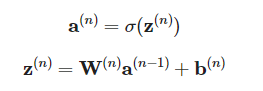

In this worksheet we will use the logistic function as our activation function, rather than the more familiar .

 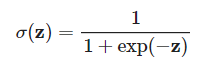

There is no need to edit the following cells. They do not form part of the assessment. You may wish to study how it works though.

In [ ]:
%pylab notebook
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

def plot_training (x, y, iterations=10000, aggression=3.5, noise=1) :
    global W1, W2, W3, b1, b2, b3
    fig,ax = plt.subplots(figsize=(8, 8), dpi= 80)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_aspect(1)

    xx = np.arange(0, 1.01, 0.01)
    yy = np.arange(0, 1.01, 0.01)
    X, Y = np.meshgrid(xx, yy)
    Z = ((X-0.5)**2 + (Y-1)**2)**(1/2) / (1.25)**(1/2) #Z = ((X-0.5)^2 + (Y-1)^2)^(1/2) / (1.25)^(1/2)
    im = ax.imshow(Z, vmin=0, vmax=1, extent=[0, 1, 1, 0], cmap=blueMap)

    ax.plot(y[0],y[1], lw=1.5, color=green);

    while iterations>=0 :
        j_W1 = J_W1(x, y) * (1 + np.random.randn() * noise)
        j_W2 = J_W2(x, y) * (1 + np.random.randn() * noise)
        j_W3 = J_W3(x, y) * (1 + np.random.randn() * noise)
        j_b1 = J_b1(x, y) * (1 + np.random.randn() * noise)
        j_b2 = J_b2(x, y) * (1 + np.random.randn() * noise)
        j_b3 = J_b3(x, y) * (1 + np.random.randn() * noise)

        W1 = W1 - j_W1 * aggression
        W2 = W2 - j_W2 * aggression
        W3 = W3 - j_W3 * aggression
        b1 = b1 - j_b1 * aggression
        b2 = b2 - j_b2 * aggression
        b3 = b3 - j_b3 * aggression

        if (iterations%100==0) :
            nf = network_function(x)[-1]
            ax.plot(nf[0],nf[1], lw=2, color=magentaTrans);
        iterations -= 1

    nf = network_function(x)[-1]
    ax.plot(nf[0],nf[1], lw=2.5, color=orange);


def training_data (N = 100) :
    x = np.arange(0,1,1/N)
    y = np.array([
      16*np.sin(2*np.pi*x)**3,
      13*np.cos(2*np.pi*x) - 5*np.cos(2*2*np.pi*x) - 2*np.cos(3*2*np.pi*x)- np.cos(4*2*np.pi*x)
    ]
    ) / 20
    y = (y+1)/2
    x = np.reshape(x, (1, N))
    #y = np.reshape(y, (2, N))
    return x, y

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

magenta = (0xfc/255, 0x75/255, 0xdb/255) # Brighter magenta
magentaTrans = (0xfc/255, 0x75/255, 0xdb/255, 0.1) # Brighter Transparent magenta
orange = (218/255, 171/255, 115/255)
green = (175/255, 219/255, 133/255)
white = (240/255, 245/255, 250/255)
blue1 = (70/255, 101/255, 137/255)
blue2 = (122/255, 174/255, 215/255)

blueMap = make_colormap([blue2, blue1])


Populating the interactive namespace from numpy and matplotlib


In [ ]:
# PACKAGE
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# PACKAGE
# First load the worksheet dependencies.
# Here is the activation function and its derivative.
sigma = lambda z : 1 / (1 + np.exp(-z))
d_sigma = lambda z : np.cosh(z/2)**(-2) / 4

# This function initialises the network with it's structure, it also resets any training already done.
def reset_network (n1 = 6, n2 = 7, random=np.random) :
    global W1, W2, W3, b1, b2, b3
    W1 = random.randn(n1, 1) / 2
    W2 = random.randn(n2, n1) / 2
    W3 = random.randn(2, n2) / 2
    b1 = random.randn(n1, 1) / 2
    b2 = random.randn(n2, 1) / 2
    b3 = random.randn(2, 1) / 2

# This function feeds forward each activation to the next layer. It returns all weighted sums and activations.
def network_function(a0) :
    z1 = W1 @ a0 + b1
    a1 = sigma(z1)
    z2 = W2 @ a1 + b2
    a2 = sigma(z2)
    z3 = W3 @ a2 + b3
    a3 = sigma(z3)
    return a0, z1, a1, z2, a2, z3, a3

# This is the cost function of a neural network with respect to a training set.
def cost(x, y) :
    return np.linalg.norm(network_function(x)[-1] - y)**2 / x.size

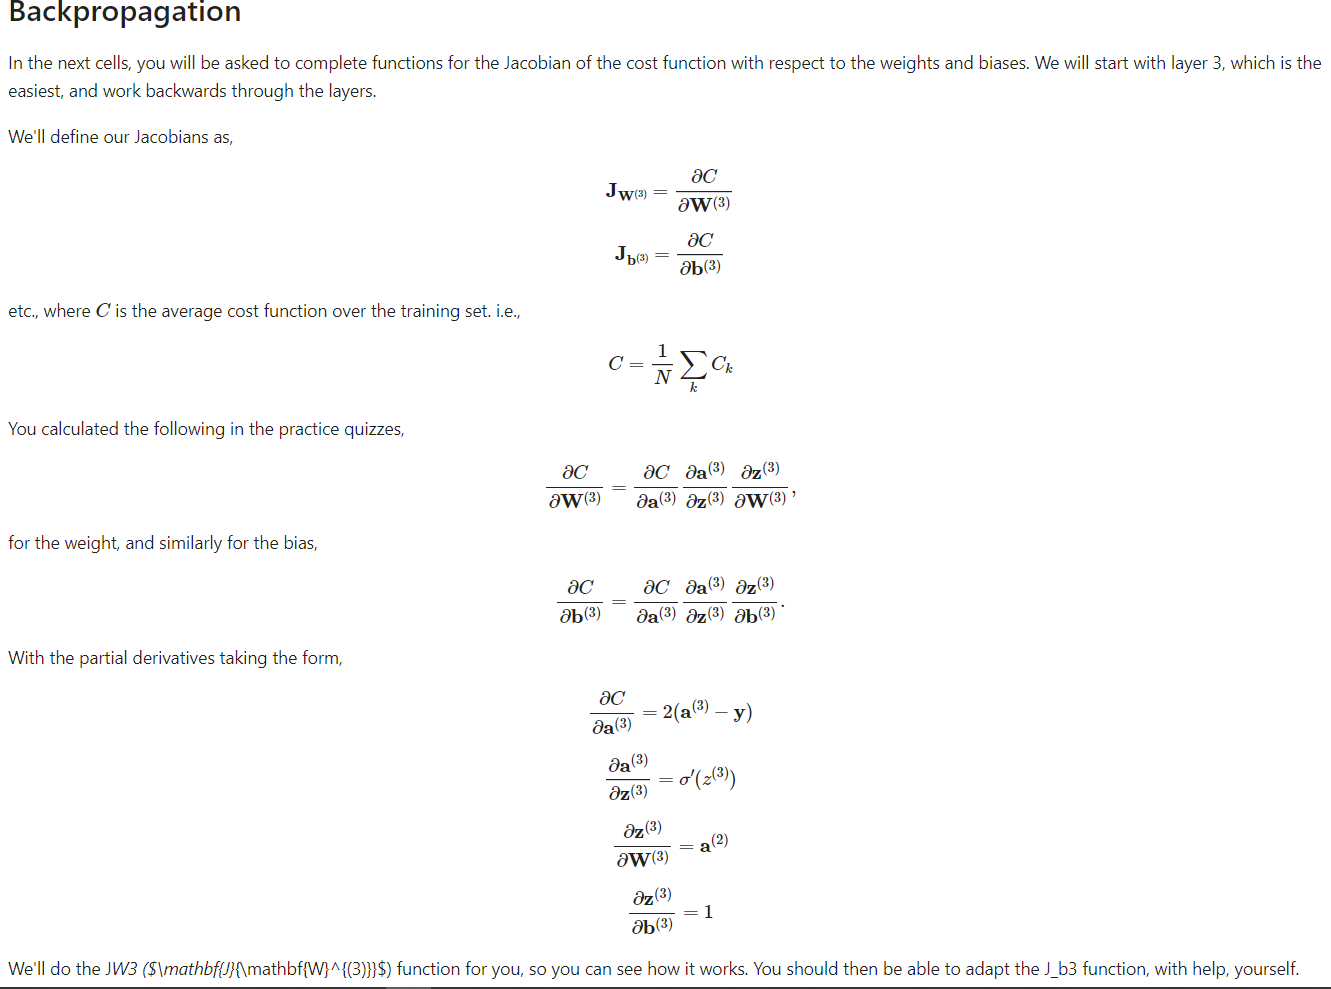

In [ ]:
# Jacobian for the third layer weights. There is no need to edit this function.
def J_W3 (x, y) :
    # First get all the activations and weighted sums at each layer of the network.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    # We'll use the variable J to store parts of our result as we go along, updating it in each line.
    # Firstly, we calculate dC/da3, using the expressions above.
    J = 2 * (a3 - y)
    # Next multiply the result we've calculated by the derivative of sigma, evaluated at z3.
    J = J * d_sigma(z3)
    # Then we take the dot product (along the axis that holds the training examples) with the final partial derivative,
    # i.e. dz3/dW3 = a2
    # and divide by the number of training examples, for the average over all training examples.
    J = J @ a2.T / x.size
    # Finally return the result out of the function.
    return J

# In this function, you will implement the jacobian for the bias.
# As you will see from the partial derivatives, only the last partial derivative is different.
# The first two partial derivatives are the same as previously.
# ===YOU SHOULD EDIT THIS FUNCTION===
def J_b3 (x, y) :
    # As last time, we'll first set up the activations.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    # Next you should implement the first two partial derivatives of the Jacobian.
    # ===COPY TWO LINES FROM THE PREVIOUS FUNCTION TO SET UP THE FIRST TWO JACOBIAN TERMS===
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    # For the final line, we don't need to multiply by dz3/db3, because that is multiplying by 1.
    # We still need to sum over all training examples however.
    # There is no need to edit this line.
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

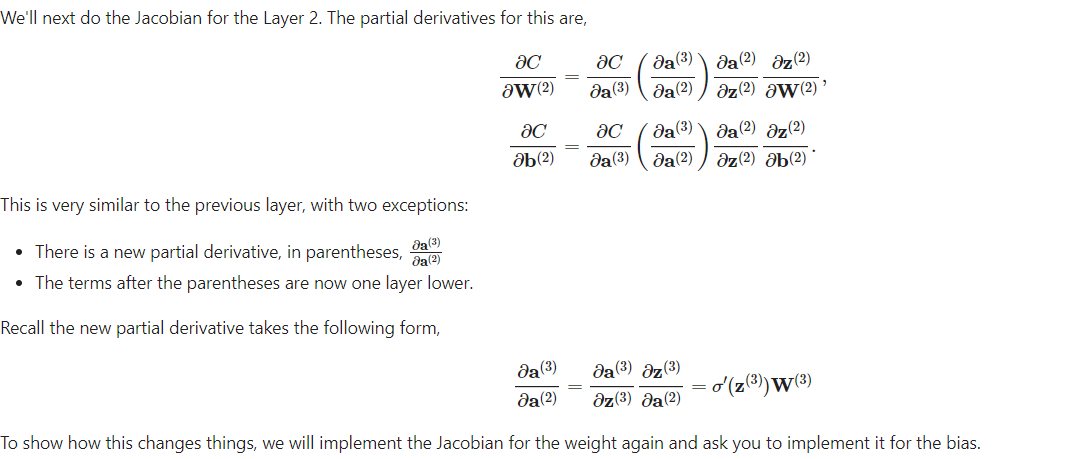

In [ ]:
# Compare this function to J_W3 to see how it changes.
# There is no need to edit this function.
def J_W2 (x, y) :
    #The first two lines are identical to in J_W3.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)    
    J = 2 * (a3 - y)
    # the next two lines implement da3/da2, first σ' and then W3.
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    # then the final lines are the same as in J_W3 but with the layer number bumped down.
    J = J * d_sigma(z2)
    J = J @ a1.T / x.size
    return J

# As previously, fill in all the incomplete lines.
# ===YOU SHOULD EDIT THIS FUNCTION===
def J_b2 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

Below is the list of basic operations that we can perform in vector.

    Arithmetic
    Subtraction
    Multiplication
    Division
    Dot Product
    Scalar Multiplications
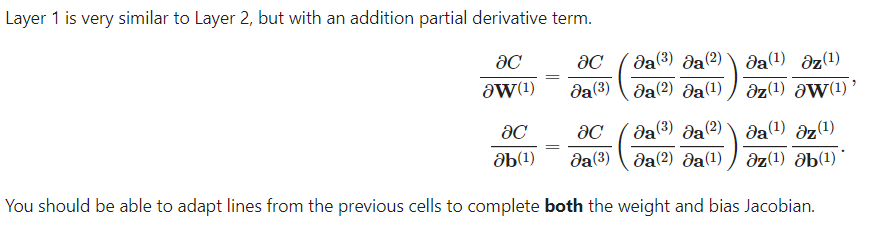

In [ ]:
# Fill in all incomplete lines.
# ===YOU SHOULD EDIT THIS FUNCTION===
def J_W1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2*(a3-y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = (J.T @ W2).T
    J = J * d_sigma(z1)
    J = J @ a0.T / x.size
    return J

# Fill in all incomplete lines.
# ===YOU SHOULD EDIT THIS FUNCTION===
def J_b1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = (J.T @ W2).T
    J = J * d_sigma(z1)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

In [ ]:
x, y = training_data()
reset_network()

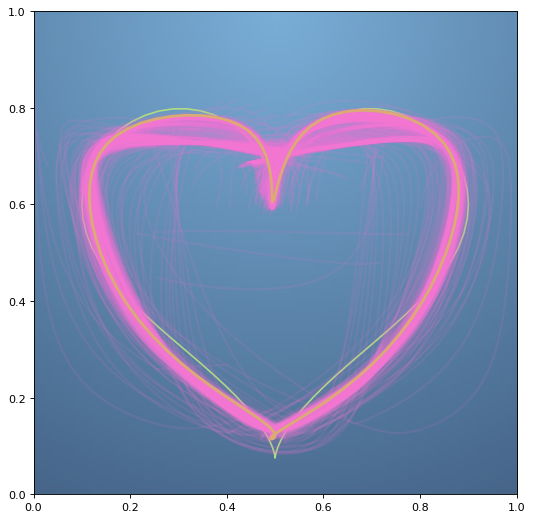

In [ ]:
plot_training(x, y, iterations=50000, aggression=7, noise=1)